In [1]:
import numpy as np

import torch
import torch.nn as nn

from captum.attr import IntegratedGradients

torch.manual_seed(123)
np.random.seed(123)


class ToyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(3, 3)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(3, 2)

        # initialize weights and biases
        self.lin1.weight = nn.Parameter(torch.arange(-4.0, 5.0).view(3, 3))
        self.lin1.bias = nn.Parameter(torch.zeros(1, 3))
        self.lin2.weight = nn.Parameter(torch.arange(-3.0, 3.0).view(2, 3))
        self.lin2.bias = nn.Parameter(torch.ones(1, 2))

    def forward(self, input):
        return self.lin2(self.relu(self.lin1(input)))


model = ToyModel()
model.eval()

ToyModel(
  (lin1): Linear(in_features=3, out_features=3, bias=True)
  (relu): ReLU()
  (lin2): Linear(in_features=3, out_features=2, bias=True)
)

In [2]:
input = torch.rand(2, 3)
baseline = torch.zeros(2, 3)

In [3]:
ig = IntegratedGradients(model)
attributions, delta = ig.attribute(input, baseline, target=0, return_convergence_delta=True)
print("IG Attributions:", attributions)
print("Convergence Delta:", delta)

IG Attributions: tensor([[-1.7071, -1.7795, -2.5469],
        [-1.9653, -0.8235, -2.6335]])
Convergence Delta: tensor([4.7684e-07, 0.0000e+00])


Quickstart from Github page:

In [4]:
import numpy as np

import torch
import torch.nn as nn

from captum.attr import (
    GradientShap,
    DeepLift,
    DeepLiftShap,
    IntegratedGradients,
    LayerConductance,
    NeuronConductance,
    NoiseTunnel,
)


class ToyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(3, 3)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(3, 2)

        # initialize weights and biases
        self.lin1.weight = nn.Parameter(torch.arange(-4.0, 5.0).view(3, 3))
        self.lin1.bias = nn.Parameter(torch.zeros(1, 3))
        self.lin2.weight = nn.Parameter(torch.arange(-3.0, 3.0).view(2, 3))
        self.lin2.bias = nn.Parameter(torch.ones(1, 2))

    def forward(self, input):
        return self.lin2(self.relu(self.lin1(input)))

In [5]:
model = ToyModel()
model.eval()

ToyModel(
  (lin1): Linear(in_features=3, out_features=3, bias=True)
  (relu): ReLU()
  (lin2): Linear(in_features=3, out_features=2, bias=True)
)

In [6]:
torch.manual_seed(123)
np.random.seed(123)

In [7]:
input = torch.rand(2, 3)
baseline = torch.zeros(2, 3)

In [8]:
ig = IntegratedGradients(model)
attributions, delta = ig.attribute(input, baseline, target=0, return_convergence_delta=True)
print("IG Attributions:", attributions)
print("Convergence Delta:", delta)

IG Attributions: tensor([[-0.5922, -1.5497, -1.0067],
        [ 0.0000, -0.2219, -5.1991]])
Convergence Delta: tensor([2.3842e-07, 0.0000e+00])


In [9]:
gs = GradientShap(model)

# We define a distribution of baselines and draw `n_samples` from that
# distribution in order to estimate the expectations of gradients across all baselines
baseline_dist = torch.randn(10, 3) * 0.001
attributions, delta = gs.attribute(
    input, stdevs=0.09, n_samples=4, baselines=baseline_dist, target=0, return_convergence_delta=True
)
print("GradientShap Attributions:", attributions)
print("Convergence Delta:", delta)

GradientShap Attributions: tensor([[-0.1542, -1.6229, -1.5835],
        [-0.3916, -0.2836, -4.6851]])
Convergence Delta: tensor([ 0.0000, -0.0005, -0.0029, -0.0084, -0.0087, -0.0405,  0.0000, -0.0084])


In [10]:
dl = DeepLift(model)
attributions, delta = dl.attribute(input, baseline, target=0, return_convergence_delta=True)
print("DeepLift Attributions:", attributions)
print("Convergence Delta:", delta)

DeepLift Attributions: tensor([[-0.5922, -1.5497, -1.0067],
        [ 0.0000, -0.2219, -5.1991]], grad_fn=<MulBackward0>)
Convergence Delta: tensor([0., 0.])


/home/ge28/Desktop/Python/trab_final/APRENDIZADO_T2/.venv/lib/python3.10/site-packages/captum/attr/_core/deep_lift.py:294: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  gradient_mask = apply_gradient_requirements(inputs_tuple)
/home/ge28/Desktop/Python/trab_final/APRENDIZADO_T2/.venv/lib/python3.10/site-packages/captum/log/dummy_log.py:39: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  return func(*args, **kwargs)


In [11]:
dl = DeepLiftShap(model)
attributions, delta = dl.attribute(input, baseline_dist, target=0, return_convergence_delta=True)
print("DeepLiftSHAP Attributions:", attributions)
print("Convergence Delta:", delta)

DeepLiftSHAP Attributions: tensor([[-5.8452e-01, -1.5447e+00, -1.0094e+00],
        [ 6.4696e-04, -2.2256e-01, -5.1892e+00]], grad_fn=<MeanBackward1>)
Convergence Delta: tensor([ 0.0000e+00, -2.3842e-07,  0.0000e+00,  2.3842e-07,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  2.3842e-07,  2.3842e-07,  4.7684e-07,
         4.7684e-07,  0.0000e+00, -4.7684e-07,  0.0000e+00, -4.7684e-07,
        -4.7684e-07,  0.0000e+00, -4.7684e-07,  4.7684e-07,  0.0000e+00])


/home/ge28/Desktop/Python/trab_final/APRENDIZADO_T2/.venv/lib/python3.10/site-packages/captum/attr/_core/deep_lift.py:810: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  attributions = super().attribute.__wrapped__(  # type: ignore


In [12]:
ig = IntegratedGradients(model)
nt = NoiseTunnel(ig)
attributions, delta = nt.attribute(
    input, nt_type="smoothgrad", stdevs=0.02, nt_samples=4, baselines=baseline, target=0, return_convergence_delta=True
)
print("IG + SmoothGrad Attributions:", attributions)
print("Convergence Delta:", delta)

IG + SmoothGrad Attributions: tensor([[-0.4574, -1.5493, -1.0893],
        [ 0.0000, -0.2647, -5.1619]])
Convergence Delta: tensor([ 2.3842e-07,  2.3842e-07, -2.3842e-07,  0.0000e+00,  0.0000e+00,
        -4.7684e-07,  4.7684e-07,  0.0000e+00])


In [13]:
nc = NeuronConductance(model, model.lin1)
attributions = nc.attribute(input, neuron_selector=1, target=0)
print("Neuron Attributions:", attributions)

Neuron Attributions: tensor([[ 0.0000,  0.0000,  0.0000],
        [ 1.3358,  0.0000, -1.6811]])


In [14]:
lc = LayerConductance(model, model.lin1)
attributions, delta = lc.attribute(input, baselines=baseline, target=0, return_convergence_delta=True)
print("Layer Attributions:", attributions)
print("Convergence Delta:", delta)

Layer Attributions: tensor([[ 0.0000,  0.0000, -3.1452],
        [ 0.0000, -0.3555, -5.0596]], grad_fn=<SumBackward1>)
Convergence Delta: tensor([0.0034, 0.0059])


I'm not sure how to interpret these values yet, so I read and executed the tutorial https://captum.ai/tutorials/Titanic_Basic_Interpret below

In [15]:
# Initial imports
import numpy as np

import torch

from captum.attr import IntegratedGradients
from captum.attr import LayerConductance
from captum.attr import NeuronConductance

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

from scipy import stats
import pandas as pd

In [16]:
# dataset_path = "titanic3.csv"
# titanic_data = pd.read_csv(dataset_path)

# dataset_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
dataset_url = "https://raw.githubusercontent.com/jbryer/CompStats/master/Data/titanic3.csv"
titanic_data = pd.read_csv(dataset_url)
titanic_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [17]:
# titanic_data.columns = [col.lower() for col in titanic_data.columns]
# titanic_data

In [18]:
# titanic_data.columns

In [19]:
titanic_data = pd.concat(
    [
        titanic_data,
        pd.get_dummies(titanic_data["sex"]),
        pd.get_dummies(titanic_data["embarked"], prefix="embark"),
        pd.get_dummies(titanic_data["pclass"], prefix="class"),
    ],
    axis=1,
)
titanic_data["age"] = titanic_data["age"].fillna(titanic_data["age"].mean())
titanic_data["fare"] = titanic_data["fare"].fillna(titanic_data["fare"].mean())
titanic_data = titanic_data.drop(
    ["name", "ticket", "cabin", "boat", "body", "home.dest", "sex", "embarked", "pclass"], axis=1
)
# titanic_data = titanic_data.drop(["name", "ticket", "cabin", "sex", "embarked", "pclass"], axis=1)
titanic_data

,survived,age,sibsp,parch,fare,female,male,embark_C,embark_Q,embark_S,class_1,class_2,class_3
0,1,29.000000,0,0,211.3375,True,False,False,False,True,True,False,False
1,1,0.920000,1,2,151.5500,False,True,False,False,True,True,False,False
2,0,2.000000,1,2,151.5500,True,False,False,False,True,True,False,False
3,0,30.000000,1,2,151.5500,False,True,False,False,True,True,False,False
4,0,25.000000,1,2,151.5500,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,14.500000,1,0,14.4542,True,False,True,False,False,False,False,True
1305,0,29.881138,1,0,14.4542,True,False,True,False,False,False,False,True
1306,0,26.500000,0,0,7.2250,False,True,True,False,False,False,False,True
1307,0,27.000000,0,0,7.2250,False,True,True,False,False,False,False,True


In [20]:
# Set random seed for reproducibility.
np.random.seed(131254)

# Convert features and labels to numpy arrays.
labels = titanic_data["survived"].to_numpy()
titanic_data = titanic_data.drop(["survived"], axis=1)
feature_names = list(titanic_data.columns)
data = titanic_data.to_numpy()

# Separate training and test sets using
train_indices = np.random.choice(len(labels), int(0.7 * len(labels)), replace=False)
test_indices = list(set(range(len(labels))) - set(train_indices))
train_features = np.array(data[train_indices], dtype=float)
train_labels = labels[train_indices]
test_features = np.array(data[test_indices], dtype=float)
test_labels = labels[test_indices]

In [21]:
import torch
import torch.nn as nn

torch.manual_seed(1)  # Set seed for reproducibility.


class TitanicSimpleNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(12, 12)
        self.sigmoid1 = nn.Sigmoid()
        self.linear2 = nn.Linear(12, 8)
        self.sigmoid2 = nn.Sigmoid()
        self.linear3 = nn.Linear(8, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        lin1_out = self.linear1(x)
        sigmoid_out1 = self.sigmoid1(lin1_out)
        sigmoid_out2 = self.sigmoid2(self.linear2(sigmoid_out1))
        return self.softmax(self.linear3(sigmoid_out2))

In [22]:
!wget https://github.com/pytorch/captum/raw/master/tutorials/models/titanic_model.pt -O captum-titanic_model.pt

--2025-07-09 15:29:16--  https://github.com/pytorch/captum/raw/master/tutorials/models/titanic_model.pt
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pytorch/captum/master/tutorials/models/titanic_model.pt [following]
--2025-07-09 15:29:17--  https://raw.githubusercontent.com/pytorch/captum/master/tutorials/models/titanic_model.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2240 (2,2K) [application/octet-stream]
Saving to: ‘captum-titanic_model.pt’

captum-titanic_mode 100%[===================>]   2,19K  --.-KB/s    in 0s      

2025-07-09 15:29:17 (45,8 MB/s) - ‘captum-t

In [23]:
net = TitanicSimpleNNModel()
USE_PRETRAINED_MODEL = True

if USE_PRETRAINED_MODEL:
    # net.load_state_dict(torch.load("models/titanic_model.pt"))
    net.load_state_dict(torch.load("captum-titanic_model.pt"))
    print("Model Loaded!")
    input_tensor = torch.from_numpy(train_features).type(torch.FloatTensor)
    label_tensor = torch.from_numpy(train_labels)
else:
    criterion = nn.CrossEntropyLoss()
    num_epochs = 200

    optimizer = torch.optim.Adam(net.parameters(), lr=0.1)
    input_tensor = torch.from_numpy(train_features).type(torch.FloatTensor)
    label_tensor = torch.from_numpy(train_labels)
    for epoch in range(num_epochs):
        output = net(input_tensor)
        loss = criterion(output, label_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 20 == 0:
            print("Epoch {}/{} => Loss: {:.2f}".format(epoch + 1, num_epochs, loss.item()))

    torch.save(net.state_dict(), "models/titanic_model.pt")

Model Loaded!


In [24]:
out_probs = net(input_tensor).detach().numpy()
out_classes = np.argmax(out_probs, axis=1)
print("Train Accuracy:", sum(out_classes == train_labels) / len(train_labels))

Train Accuracy: 0.8493449781659389


In [25]:
test_input_tensor = torch.from_numpy(test_features).type(torch.FloatTensor)
out_probs = net(test_input_tensor).detach().numpy()
out_classes = np.argmax(out_probs, axis=1)
print(f"out_probs.shape: {out_probs.shape}")
print(f"out_classes.shape: {out_classes.shape}")
print("Test Accuracy:", sum(out_classes == test_labels) / len(test_labels))

out_probs.shape: (393, 2)
out_classes.shape: (393,)
Test Accuracy: 0.816793893129771


In [26]:
input_tensor.shape

torch.Size([916, 12])

In [27]:
train_labels.shape

(916,)

In [28]:
test_input_tensor.shape

torch.Size([393, 12])

In [29]:
test_labels.shape

(393,)

In [30]:
# calcuate proportions between 0 and 1 in the test_labels and train_labels
train_labels_proportions = np.bincount(train_labels) / len(train_labels)
test_labels_proportions = np.bincount(test_labels) / len(test_labels)
print("Train Labels Proportions:", train_labels_proportions)
print("Test Labels Proportions:", test_labels_proportions)

Train Labels Proportions: [0.60480349 0.39519651]
Test Labels Proportions: [0.64885496 0.35114504]


In [31]:
ig = IntegratedGradients(net)

In [32]:
test_input_tensor.requires_grad_()
attr, delta = ig.attribute(test_input_tensor, target=1, return_convergence_delta=True)
attr = attr.detach().numpy()

In [33]:
# test_input_tensor.requires_grad_()
# attr, delta = ig.attribute(test_input_tensor, baselines=1, target=1, return_convergence_delta=True)
# attr = attr.detach().numpy()

In [34]:
attr.shape

(393, 12)

In [35]:
np.mean(attr, axis=0).shape

(12,)

Average Feature Importances
age :  -0.454
sibsp :  -0.119
parch :  -0.056
fare :  0.175
female :  0.154
male :  -0.359
embark_C :  0.086
embark_Q :  -0.001
embark_S :  -0.082
class_1 :  0.062
class_2 :  0.021
class_3 :  -0.159


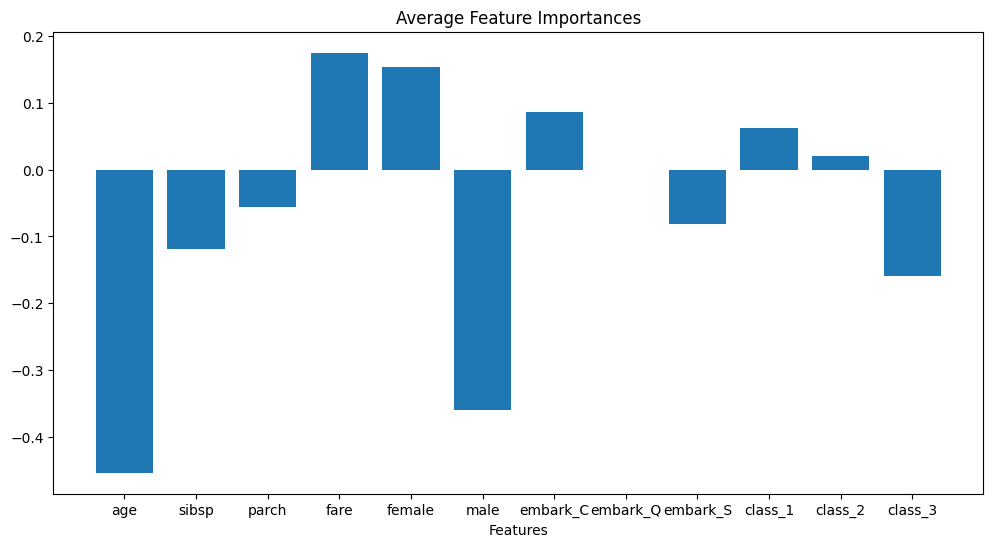

In [36]:
# Helper method to print importances and visualize distribution
def visualize_importances(
    feature_names, importances, title="Average Feature Importances", plot=True, axis_title="Features"
):
    print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ": ", "%.3f" % (importances[i]))
    x_pos = np.arange(len(feature_names))
    if plot:
        plt.figure(figsize=(12, 6))
        plt.bar(x_pos, importances, align="center")
        plt.xticks(x_pos, feature_names, wrap=True)
        plt.xlabel(axis_title)
        plt.title(title)


visualize_importances(feature_names, np.mean(attr, axis=0))

From the feature attribution information, we obtain some interesting insights regarding the importance of various features. We see that the strongest features appear to be age and being male, which are negatively correlated with survival. Embarking at Queenstown and the number of parents / children appear to be less important features generally.

An important thing to note is that the average attributions over the test set don't necessarilly capture all the information regarding feature importances. We should also look at the distribution of attributions for each feature. It is possible that features have very different attributions for different examples in the dataset.

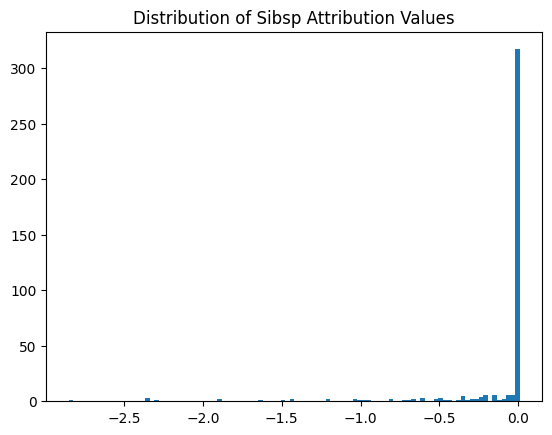

In [37]:
plt.hist(attr[:, 1], 100)
plt.title("Distribution of Sibsp Attribution Values");

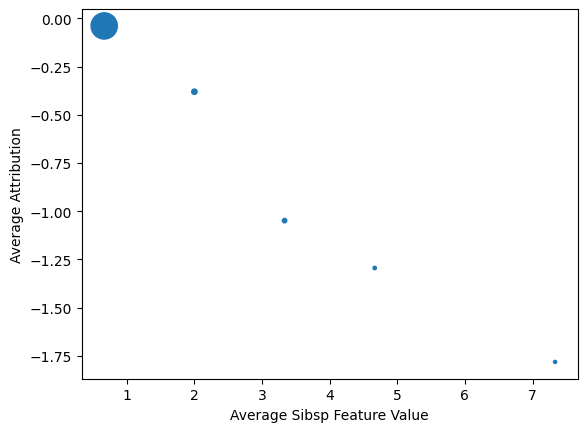

In [38]:
bin_means, bin_edges, _ = stats.binned_statistic(test_features[:, 1], attr[:, 1], statistic="mean", bins=6)
bin_count, _, _ = stats.binned_statistic(test_features[:, 1], attr[:, 1], statistic="count", bins=6)

bin_width = bin_edges[1] - bin_edges[0]
bin_centers = bin_edges[1:] - bin_width / 2
plt.scatter(bin_centers, bin_means, s=bin_count)
plt.xlabel("Average Sibsp Feature Value")
plt.ylabel("Average Attribution");

In [39]:
cond = LayerConductance(net, net.sigmoid1)

In [40]:
cond_vals = cond.attribute(test_input_tensor, target=1)
cond_vals = cond_vals.detach().numpy()

Average Neuron Importances
0 :  -0.123
1 :  -0.040
2 :  0.030
3 :  0.012
4 :  -0.022
5 :  -0.137
6 :  0.009
7 :  0.001
8 :  -0.136
9 :  -0.000
10 :  -0.306
11 :  0.016


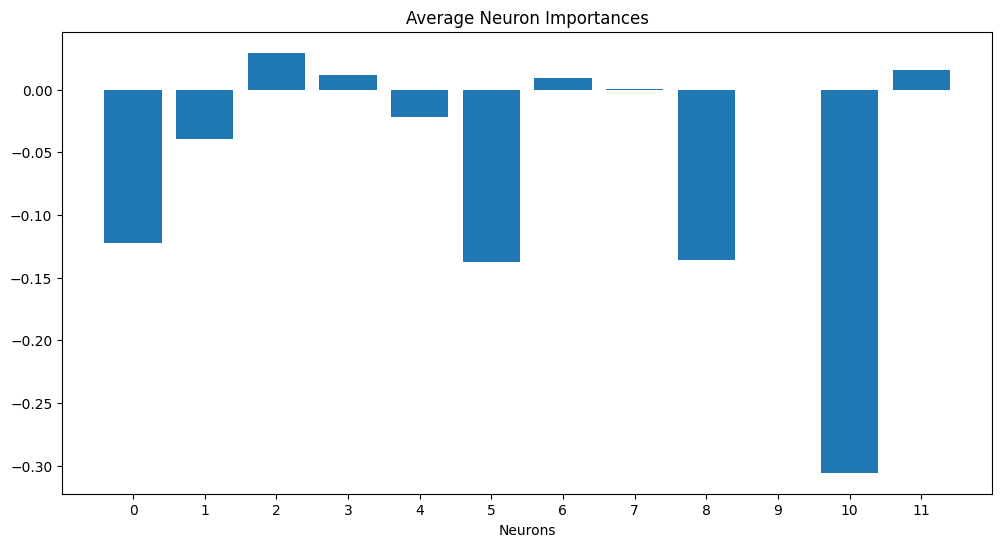

In [41]:
visualize_importances(range(12), np.mean(cond_vals, axis=0), title="Average Neuron Importances", axis_title="Neurons")


The tutorial continues approaching neuron activation explications. But I will keep up to the feature attribution for now. Also, I tried to use this method for our regression approach, like this:

```python
attr, delta = ig.attribute(test_input_tensor, target=50, return_convergence_delta=True)
attr = attr.detach().numpy()
```

But it gives the error `IndexError: index 50 is out of bounds for dimension 1 with size 1` since we are not in a classification problem, but in a regression one. The models outputs rainfall values per sample x timestep x lat x long x channel (not necessarily in this order, for the Torch tensors). So, I started investigating this other tutorial

https://captum.ai/tutorials/House_Prices_Regression_Interpret

EDIT, after running this tutorial I just found this:
```
For outputs with > 2 dimensions, targets can be either:

                        - A single tuple, which contains #output_dims - 1
                          elements. This target index is applied to all examples.

                        - A list of tuples with length equal to the number of
                          examples in inputs (dim 0), and each tuple containing
                          #output_dims - 1 elements. Each tuple is applied as the
                          target for the corresponding example.
```

In [42]:
import numpy as np

from os import path


import matplotlib.pyplot as plt

# scikit-learn related imports
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# pytorch relates imports
import torch
import torch.nn as nn
import torch.optim as optim

# imports from captum library
from captum.attr import LayerConductance, LayerActivation, LayerIntegratedGradients
from captum.attr import IntegratedGradients, DeepLift, GradientShap, NoiseTunnel, FeatureAblation

In [43]:
california = fetch_california_housing()


# https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset
feature_names = california.feature_names
"""
Features:
MedInc median income in block group
HouseAge median house age in block group
AveRooms average number of rooms per household
AveBedrms average number of bedrooms per household
Population block group population
AveOccup average number of household members
Latitude block group latitude
Longitude block group longitude
 
The target variable is the median house value for California districts, 
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census block group. 
A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data 
(a block group typically has a population of 600 to 3,000 people).
"""

# take first n examples for speed up
n = 600
X = california.data[:n]
y = california.target[:n]

In [44]:
torch.manual_seed(1234)
np.random.seed(1234)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


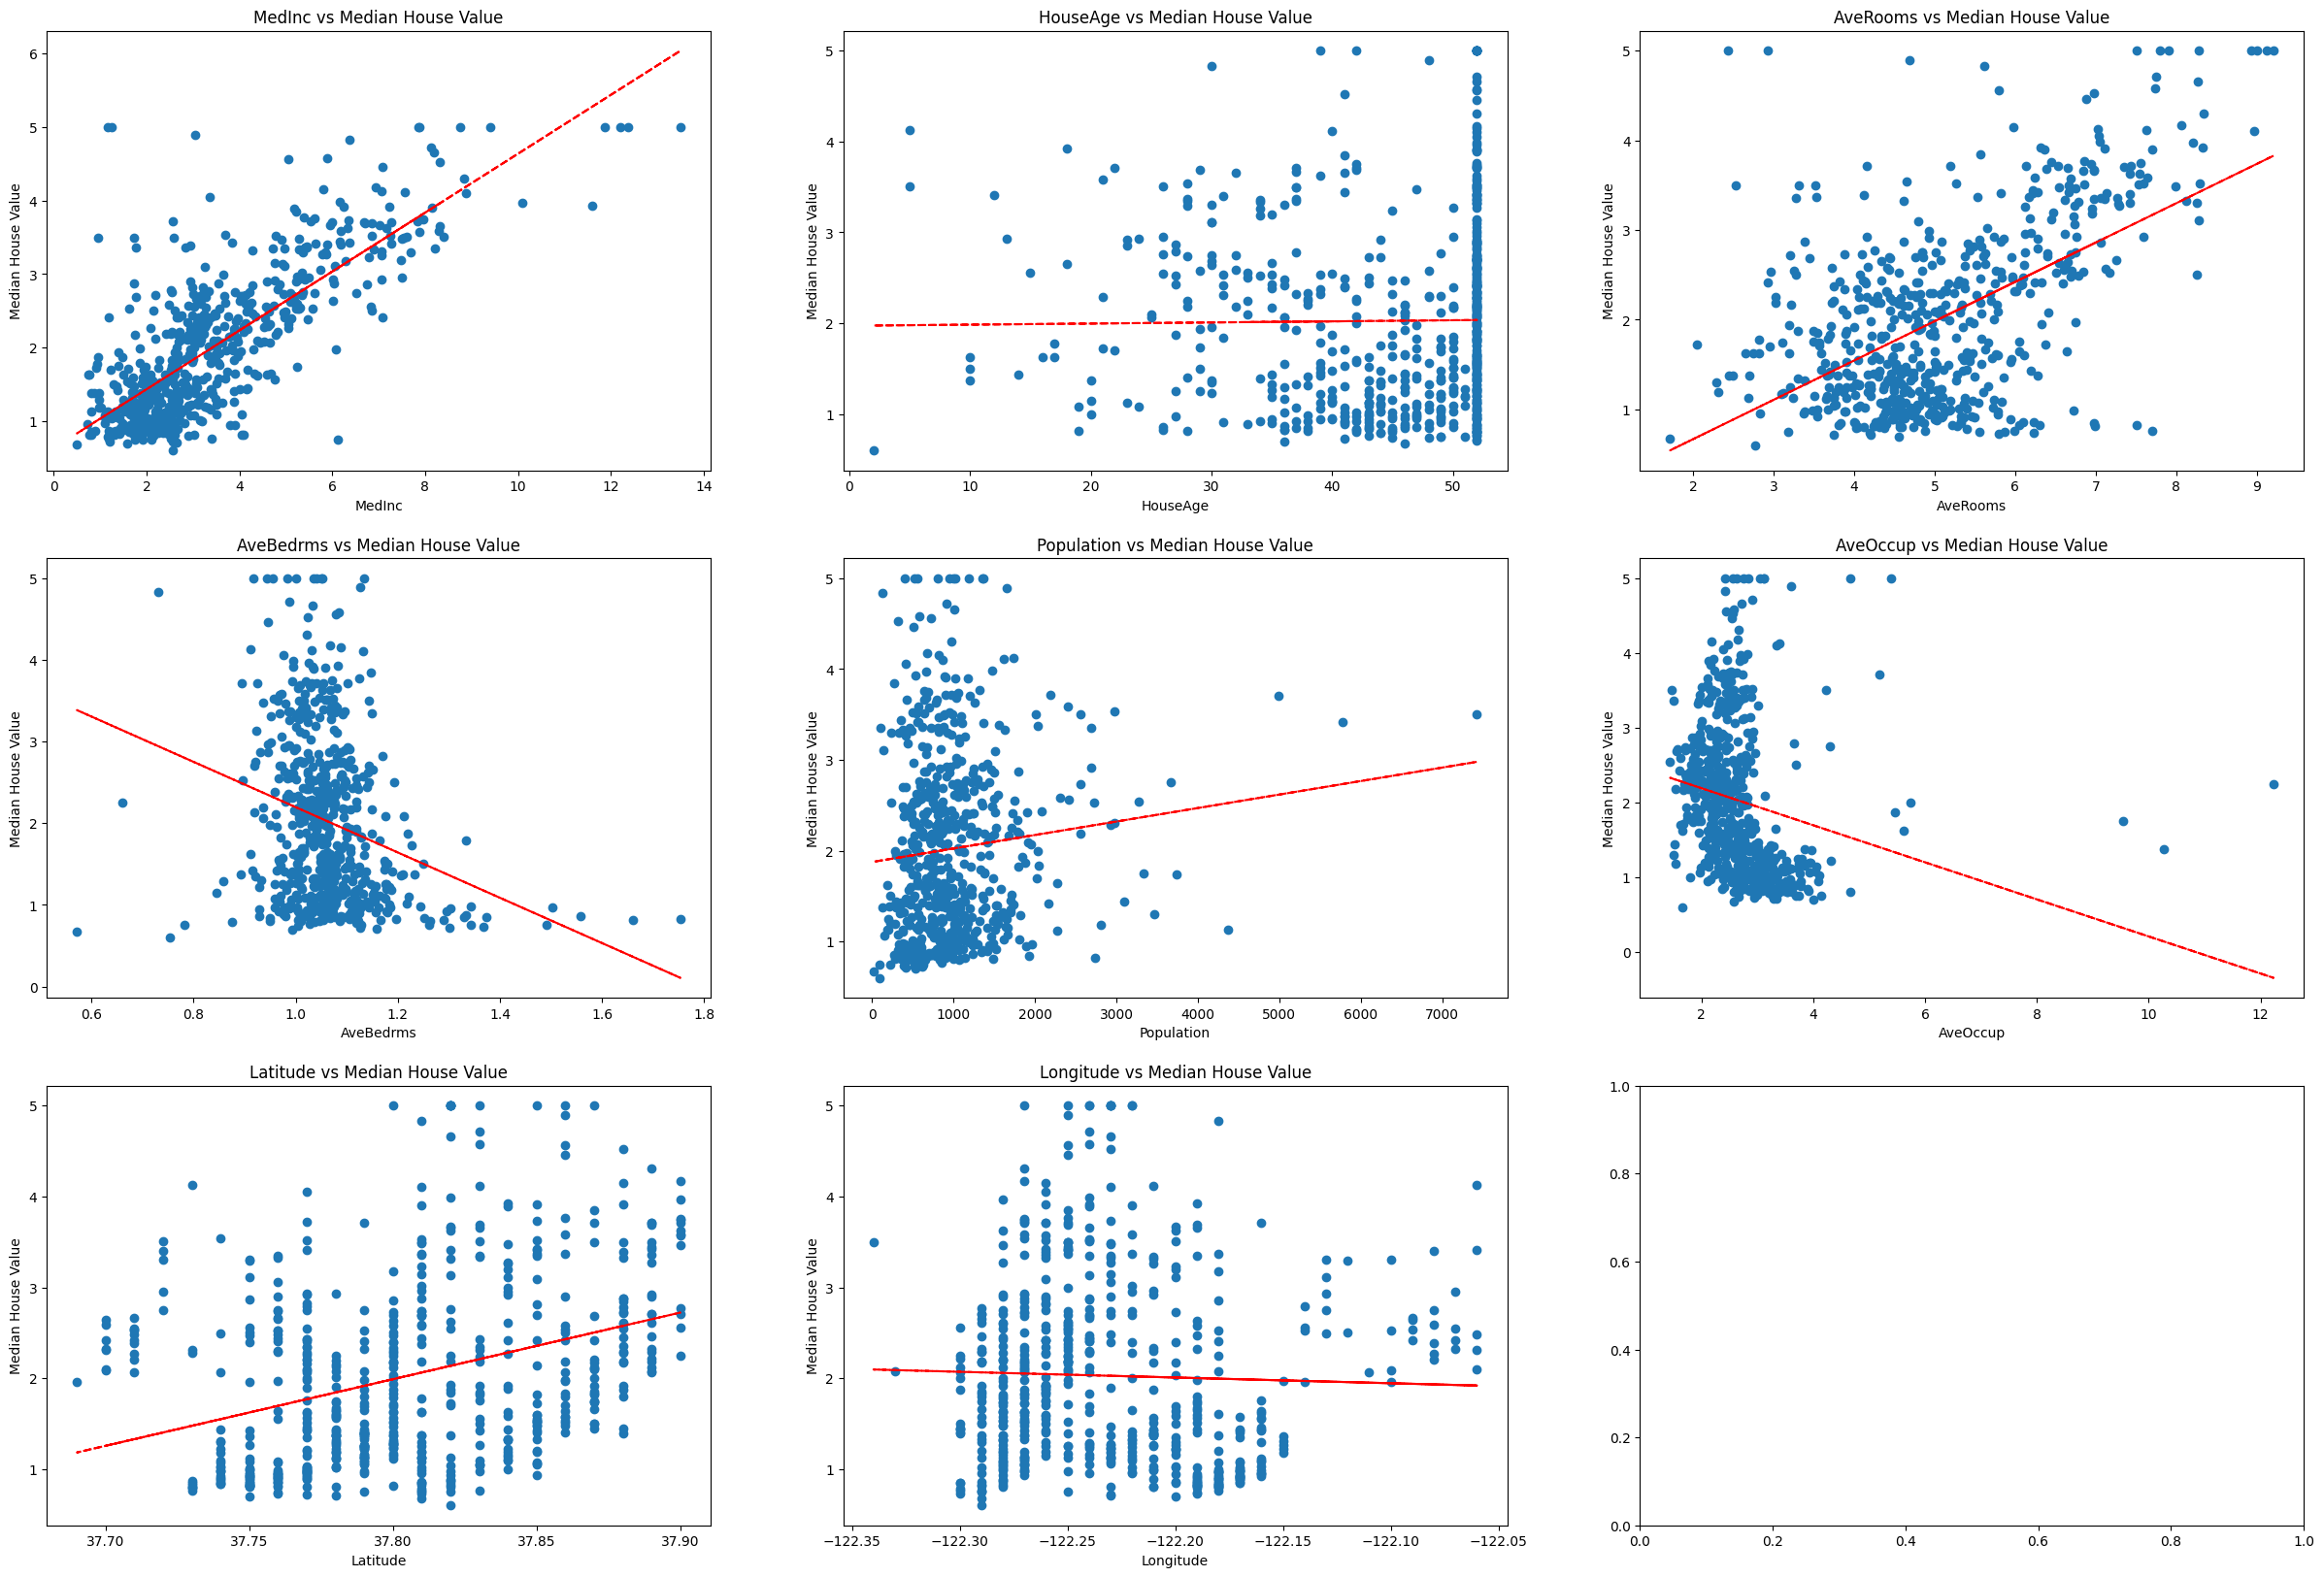

In [46]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(30, 20))
for i, (ax, col) in enumerate(zip(axs.flat, feature_names)):
    x = X[:, i]
    pf = np.polyfit(x, y, 1)
    p = np.poly1d(pf)

    ax.plot(x, y, "o")
    ax.plot(x, p(x), "r--")

    ax.set_title(col + " vs Median House Value")
    ax.set_xlabel(col)
    ax.set_ylabel("Median House Value")

In [47]:
# X_train, X_test, y_train, y_test printing shapes of:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).view(-1, 1).float()

X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).view(-1, 1).float()

datasets = torch.utils.data.TensorDataset(X_train, y_train)
train_iter = torch.utils.data.DataLoader(datasets, batch_size=10, shuffle=True)

# printin shapes of:

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (420, 8)
X_test shape: (180, 8)
y_train shape: (420,)
y_test shape: (180,)
X_train shape: torch.Size([420, 8])
y_train shape: torch.Size([420, 1])
X_test shape: torch.Size([180, 8])
y_test shape: torch.Size([180, 1])


In [48]:
batch_size = 50
num_epochs = 200
learning_rate = 0.0001
size_hidden1 = 100
size_hidden2 = 50
size_hidden3 = 10
size_hidden4 = 1

In [49]:
class CaliforniaModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(8, size_hidden1)
        self.relu1 = nn.ReLU()
        self.lin2 = nn.Linear(size_hidden1, size_hidden2)
        self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(size_hidden2, size_hidden3)
        self.relu3 = nn.ReLU()
        self.lin4 = nn.Linear(size_hidden3, size_hidden4)

    def forward(self, input):
        return self.lin4(self.relu3(self.lin3(self.relu2(self.lin2(self.relu1(self.lin1(input)))))))

In [50]:
model = CaliforniaModel()
model.train()


CaliforniaModel(
  (lin1): Linear(in_features=8, out_features=100, bias=True)
  (relu1): ReLU()
  (lin2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (lin3): Linear(in_features=50, out_features=10, bias=True)
  (relu3): ReLU()
  (lin4): Linear(in_features=10, out_features=1, bias=True)
)

In [51]:
criterion = nn.MSELoss(reduction="sum")

In [52]:
def train(model_inp, num_epochs=num_epochs):
    optimizer = torch.optim.RMSprop(model_inp.parameters(), lr=learning_rate)
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        for inputs, labels in train_iter:
            # forward pass
            outputs = model_inp(inputs)
            # defining loss
            loss = criterion(outputs, labels)
            # zero the parameter gradients
            optimizer.zero_grad()
            # computing gradients
            loss.backward()
            # accumulating running loss
            running_loss += loss.item()
            # updated weights based on computed gradients
            optimizer.step()
        if epoch % 20 == 0:
            print(
                "Epoch [%d]/[%d] running accumulative loss across all batches: %.3f"
                % (epoch + 1, num_epochs, running_loss)
            )
        running_loss = 0.0

In [53]:
def train_load_save_model(model_obj, model_path):
    if path.isfile(model_path):
        # load model
        print("Loading pre-trained model from: {}".format(model_path))
        model_obj.load_state_dict(torch.load(model_path))
    else:
        # train model
        train(model_obj)
        print("Finished training the model. Saving the model to the path: {}".format(model_path))
        torch.save(model_obj.state_dict(), model_path)

In [54]:
!wget https://github.com/pytorch/captum/raw/master/tutorials/models/california_model.pt -O captum-california_model.pt

--2025-07-09 15:29:23--  https://github.com/pytorch/captum/raw/master/tutorials/models/california_model.pt
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pytorch/captum/master/tutorials/models/california_model.pt [following]
--2025-07-09 15:29:23--  https://raw.githubusercontent.com/pytorch/captum/master/tutorials/models/california_model.pt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8003::154, 2606:50c0:8000::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8003::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28431 (28K) [application/octet-stream]
Saving to: ‘captum-california_model.pt’

captum-california_m 100%[===================>]  27,76K  --.-KB/s    in 0,003s  

2025-07-09 15:29:24 (10,5 MB/s)

In [55]:
SAVED_MODEL_PATH = "captum-california_model.pt"
train_load_save_model(model, SAVED_MODEL_PATH)

Loading pre-trained model from: captum-california_model.pt


In [56]:
model.eval()
outputs = model(X_test)
err = np.sqrt(mean_squared_error(outputs.detach().numpy(), y_test.detach().numpy()))

print("model err: ", err)

model err:  0.6579745204131687


In [57]:
# FROM HERE I didn't continue the tutorial. I adapted the first tutorial actually, see eae_no_latitude_e_longitude_specific_only_t0_rmse_log_1_shape_clean-camera-ready-doublecheck-CAPTUM.ipynb

# ig = IntegratedGradients(model)
# ig_nt = NoiseTunnel(ig)
# dl = DeepLift(model)
# gs = GradientShap(model)
# fa = FeatureAblation(model)

# ig_attr_test = ig.attribute(X_test, n_steps=50)
# ig_nt_attr_test = ig_nt.attribute(X_test)
# dl_attr_test = dl.attribute(X_test)
# gs_attr_test = gs.attribute(X_test, X_train)
# fa_attr_test = fa.attribute(X_test)

